### Customer Personality Analysis

## Context

### Context of Dataframe

Customer personality analysis is an essential process for any business aiming to gain a deeper understanding of its customer base. This comprehensive examination enables a company to grasp the intricacies of its customers' preferences, behaviors, and concerns, ultimately facilitating the customization of products and services to cater to the diverse needs of various customer segments.

By conducting a customer personality analysis, a business can efficiently adapt its offerings to align with the preferences and characteristics of distinct customer groups. This strategic approach allows the company to optimize its marketing efforts and allocate resources wisely. Rather than indiscriminately promoting a new product to all customers in its database, the company can identify the customer segment most likely to be interested in the product and target its marketing campaigns specifically to that segment.

In summary, customer personality analysis empowers businesses to refine their product development, marketing strategies, and overall customer engagement by recognizing and addressing the unique traits and preferences of different customer segments.


# Data Analysis Repository

In this repository, we aim to conduct a comprehensive analysis of a provided dataset. Our objectives are twofold: first, to gain a deep understanding of the dataset itself, and second, to explore its structural elements and variables in detail.

## Objectives

Our analysis serves several crucial purposes, including informing decision-making, facilitating strategic planning, and deriving data-driven insights. By closely examining the dataset, we intend to uncover valuable information and patterns that can inform business strategies and decision-making processes.

Our exploration of the dataset will encompass the following key aspects:

1. **Data Understanding**: We will begin by familiarizing ourselves with the dataset's content, including its sources, formats, and relevant background information. This step is vital for establishing context and understanding the dataset's origin and purpose.

2. **Data Structure**: We will investigate the overall structure of the database, including the number of tables, their relationships, and the schema. This will provide insights into how the data is organized and connected.

3. **Variable Analysis**: A detailed examination of the dataset's variables (columns) is essential. We'll assess data types, distribution, missing values, and potential outliers. Understanding the characteristics of each variable is crucial for subsequent analysis.

4. **Descriptive Statistics**: Calculating and presenting descriptive statistics such as means, medians, standard deviations, and percentiles will provide a summary of central tendencies and variability within the data.

5. **Data Visualization**: We'll employ data visualization techniques to present the dataset's information graphically. This includes creating charts, plots, and graphs to visualize trends, patterns, and relationships among variables.

6. **Data Cleaning**: If necessary, data cleaning operations will be performed to address missing data, outliers, or inconsistencies. Data cleaning ensures the accuracy and reliability of subsequent analyses.

7. **Exploratory Data Analysis (EDA)**: In-depth analysis of the dataset will uncover insights, anomalies, and potential correlations. This step often includes hypothesis testing and identifying variables that significantly impact the target of interest.



### Library(s)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

### Loading the DataFrame


In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Struture of Dataframe and Variables

In [13]:
num_rows, num_columns = df.shape

print(f"Number of Line: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Line: 2240
Number of Columns: 29


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In the code above we can visualize the variables present in the data set, below there is a description of each respective variable. 

**People**

- `ID`: Unique customer identifier
- `Year_Birth`: Birth year of the customer
- `Education`: Customer's education level
- `Marital_Status`: Marital status of the customer
- `Income`: Yearly household income
- `Kidhome`: Number of children in the household
- `Teenhome`: Number of teenagers in the household
- `Dt_Customer`: Enrollment date with the company
- `Recency`: Days since the last purchase
- `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- `MntWines`: Amount spent on wine in the last 2 years
- `MntFruits`: Amount spent on fruits in the last 2 years
- `MntMeatProducts`: Amount spent on meat in the last 2 years
- `MntFishProducts`: Amount spent on fish in the last 2 years
- `MntSweetProducts`: Amount spent on sweets in the last 2 years
- `MntGoldProds`: Amount spent on gold in the last 2 years

**Promotion**

- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**

- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalog
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to the company’s website in the last month


## Exploratory Data Analysis - (EDA)

Before diving into any analysis, it's crucial to initiate and prioritize a robust process of Exploratory Data Analysis (EDA). This preliminary step aims to unearth potential data imperfections, such as missing or null values, along with other anomalies.

The significance of EDA lies in its ability to:

**Identify Data Gaps**: EDA helps us detect missing or null values within the dataset, providing an early opportunity to address data gaps and maintain data integrity.

**Uncover Patterns and Trends**: By visually exploring the data through various charts and graphs, EDA can reveal underlying patterns, trends, or outliers that might otherwise go unnoticed.

### Duplicate values

In [12]:
# Check if there are any duplicate rows in the dataframe
has_duplicate_rows = df.duplicated().any();print(has_duplicate_rows)

False


### Null values

In [18]:
# Creating a table to visualize which variables have null values and also with their respective percentage.

missing_counts = df.isna().sum()
missing_percentages = missing_counts / len(df) * 100

missing_table = pd.DataFrame({'Column': missing_counts.index, 'Missing_Count': missing_counts.values, 'Missing_Percentage': missing_percentages.values})
print(missing_table)

                 Column  Missing_Count  Missing_Percentage
0                    ID              0            0.000000
1            Year_Birth              0            0.000000
2             Education              0            0.000000
3        Marital_Status              0            0.000000
4                Income             24            1.071429
5               Kidhome              0            0.000000
6              Teenhome              0            0.000000
7           Dt_Customer              0            0.000000
8               Recency              0            0.000000
9              MntWines              0            0.000000
10            MntFruits              0            0.000000
11      MntMeatProducts              0            0.000000
12      MntFishProducts              0            0.000000
13     MntSweetProducts              0            0.000000
14         MntGoldProds              0            0.000000
15    NumDealsPurchases              0            0.0000

In [21]:
# Checking wich rows have null values 

rows_with_nulls = df.isnull().any(axis=1)

print(rows_with_nulls[rows_with_nulls].index)

Int64Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,
             312,  319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081,
            2084, 2228],
           dtype='int64')


### Creating a dataframe with only null values

In [24]:
# Creating a dataframe with only null values

clean_df = df.dropna(subset=['Income'])

# Create a new DataFrame with the dropped rows

dropped_rows_df = df[~df.index.isin(clean_df.index)]

print(dropped_rows_df)

         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Gra

### Remove the Null Values from de Dataframe

In [35]:
df = df.dropna();df.shape



(2216, 29)

In the total was remove 24 rows (or 7 % of the data from the database)

### Checking unique values for each variable

In [36]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Creating Variables

We have introduced several new variables to enhance our understanding of the dataset and facilitate the development of cluster models. Let's provide a concise explanation of each new variable:

**Age**: We calculated the age of each customer based on their birth year to gain insights into the age distribution of our customer base.

**Spent_Total**: This variable represents the total amount spent by each customer across different product categories, including wines, fruits, meat products, fish products, sweets, and gold. It helps us understand the overall spending behavior of customers.

**Marital_Classification**: We categorized customers into two groups: "Married" or "Together" as 1 (indicating a partnership) and other marital statuses ("Absurd," "Widow," "YOLO," "Divorced," "Single") as 0. This binary variable simplifies marital status for analysis.

**Education_Class**: We categorized customers' education levels into numerical values (0 to 4), with "Basic" as 0, "Graduation" as 1, "2n Cycle" and "PhD" as 3, and "Master" as 4. This categorical variable provides a simplified representation of education.

**Dependents**: This variable represents the total number of dependents in a customer's household, including teenagers and children. It offers insights into family size.

**Num_Accepted_Cmp**: We computed the total number of marketing campaigns accepted by each customer. This variable aggregates the acceptance of various marketing campaigns, helping us gauge customer responsiveness.

By introducing these new variables, we have enriched our dataset with valuable insights that can aid in data exploration, clustering, and other analytical tasks. These variables provide a more holistic view of customer characteristics and behaviors, contributing to a more comprehensive analysis of the dataset.

In [43]:
df["Age"] = 2023 - df["Year_Birth"]
df['Spent_Total'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df["marital_classification"] = df["Marital_Status"].map({"Married": 1, "Together": 1, "Absurd": 0, "Widow": 0, "YOLO": 0, "Divorced": 0, "Single": 0}).astype("category")
df["Education_Class"] = df["Education"].map({"Basic": 0, "Graduation": 1, "2n Cycle": 3, "Master": 4, "PhD": 3}).astype("category")
df["Dependents"] = df["Teenhome"] + df["Kidhome"]
df['Num_Accepted_Cmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

### Remove outliers using z-score

In [46]:
z_scores = zscore(df[['Age', 'Income']])
outlier_mask = (z_scores.abs() < 3).all(axis=1)
df = df[outlier_mask]

** What it Does**

We calculate the Z-scores for two specific columns, 'Age' and 'Income', using the zscore function. Z-scores measure how far each data point is from the mean in terms of standard deviations.

We create an outlier_mask that checks if the absolute Z-scores for both 'Age' and 'Income' are less than 3 standard deviations from the mean. A threshold of 3 is commonly used to identify outliers, but it can be adjusted as needed.

We filter the DataFrame df using the outlier_mask, keeping only the rows that meet the criteria.

**Why it Matters**

Identifying and handling outliers is a crucial step in data preprocessing. Outliers can skew statistical analyses and machine learning models. By applying this code, we ensure that our dataset is more robust and suitable for subsequent analysis, reducing the impact of extreme values.

Feel free to explore the code and adapt it to your own datasets and analyses. If you have any questions or suggestions for improvements, please don't hesitate to reach out.

### Creating Views

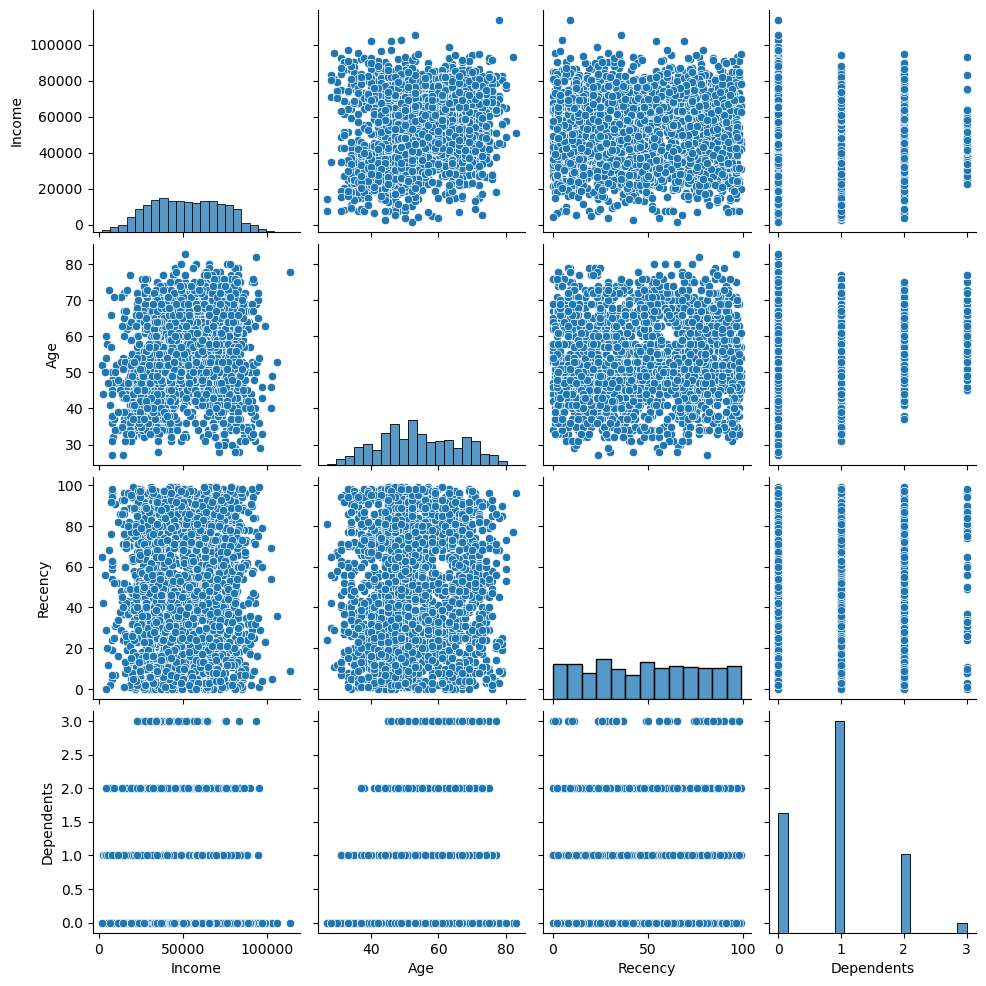

In [49]:
# visualization_1 (Ovierview)

visualization_1 = ['Income',
                      'Age',
                      'Recency',
                      'Dependents']

sns.pairplot(df[visualization_1], palette='Set1')
plt.show()

**What it Does**

We define a list of variables (visualization_1) that we want to explore. In this case, we focus on 'Income,' 'Age,' 'Recency,' and 'Dependents.'

We use the Seaborn library to create a pairplot. A pairplot is a grid of scatterplots that displays the relationships between pairs of variables. It's a powerful tool to visualize how variables correlate with each other.

We specify a color palette ('Set1') to enhance the visualization.


**Why it Matters** 

This visualization allows us to quickly assess correlations and patterns between the chosen variables. For instance, we can explore whether income and age are related or if there's any noticeable trend in the relationship between recency and the number of dependents.

Understanding these relationships is vital for making informed decisions, identifying potential factors that impact certain outcomes, and guiding subsequent analyses or strategies.







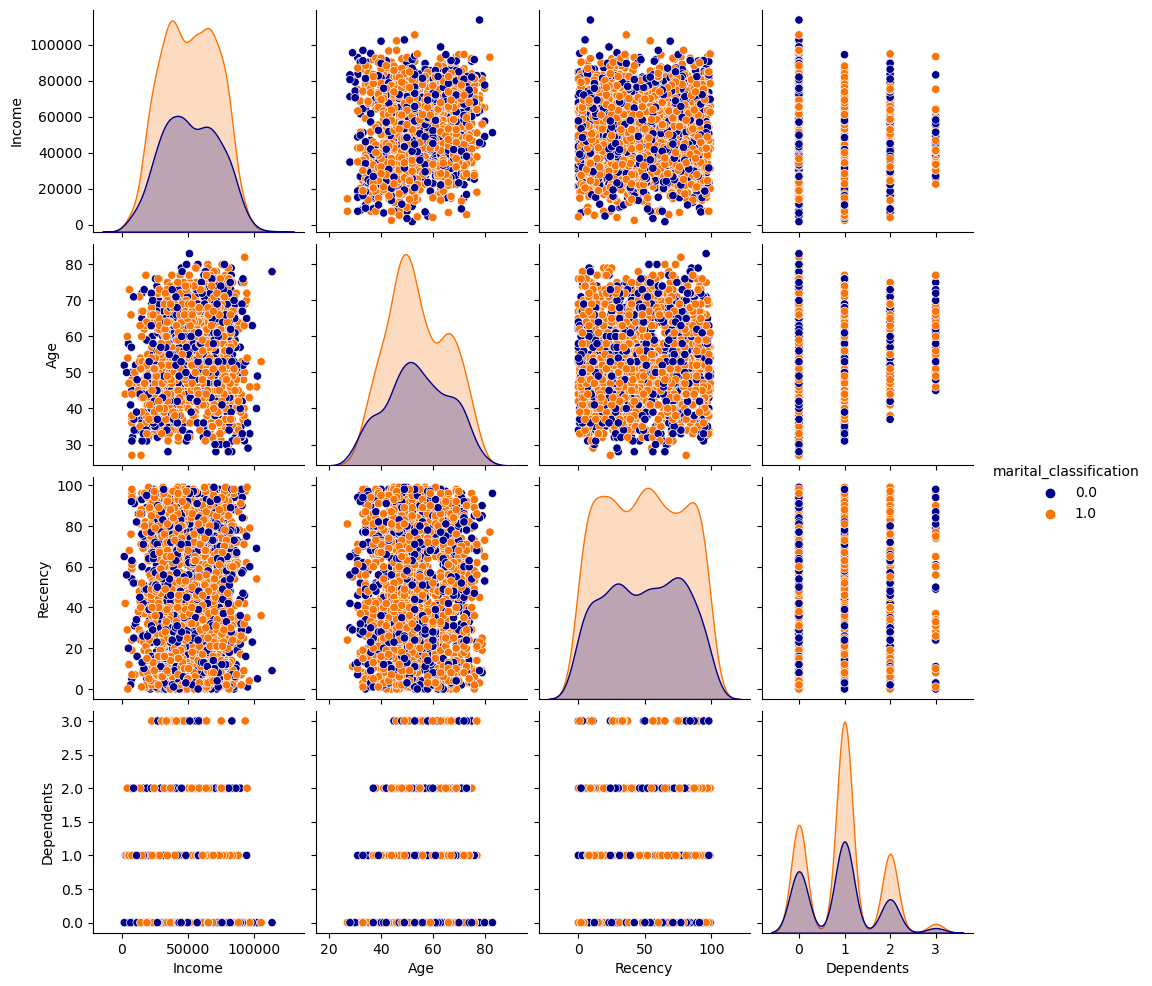

In [50]:
# visualization_2 (View by Spouse)

visualization_2 = ['Income',
                      'Age',
                      'Recency',
                      'Dependents',
                      'marital_classification']




my_palette = ["#00008B", "#F97306"]  # custom list of colors

sns.pairplot(df[visualization_2], hue="marital_classification", palette=my_palette)
plt.show()

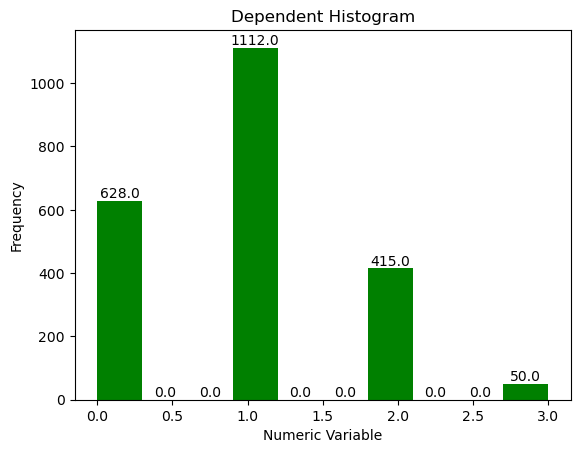

In [52]:
plt.hist(df['Dependents'], bins=10)


counts, bins, _ = plt.hist(df['Dependents'], bins=10, color='green')
for i in range(len(counts)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, counts[i], str(counts[i]), ha='center', va='bottom')

plt.title('Dependent Histogram')
plt.xlabel('Numeric Variable')
plt.ylabel('Frequency')
plt.show()

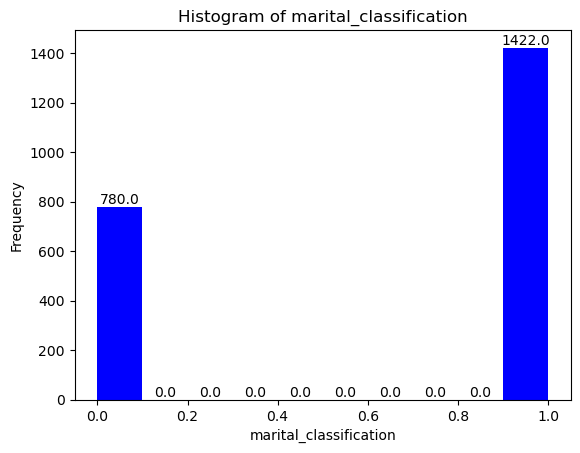

In [56]:
# barplot of marital_classification

plt.hist(df['marital_classification'], bins=10)

counts, bins, _ = plt.hist(df['marital_classification'], bins=10, color='blue')
for i in range(len(counts)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, counts[i], str(counts[i]), ha='center', va='bottom')

plt.title('Histogram of marital_classification')
plt.xlabel('marital_classification')
plt.ylabel('Frequency')
plt.show()

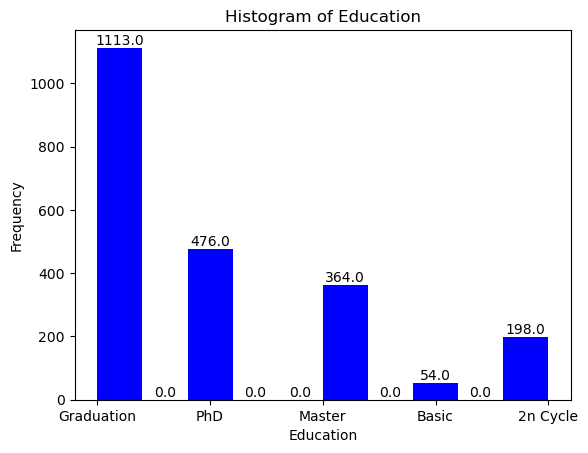

In [55]:
# Graduation

plt.hist(df['Education'], bins=10)

counts, bins, _ = plt.hist(df['Education'], bins=10, color='blue')
for i in range(len(counts)):
    plt.text(bins[i] + (bins[i+1]-bins[i])/2, counts[i], str(counts[i]), ha='center', va='bottom')

plt.title('Histogram of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show() 

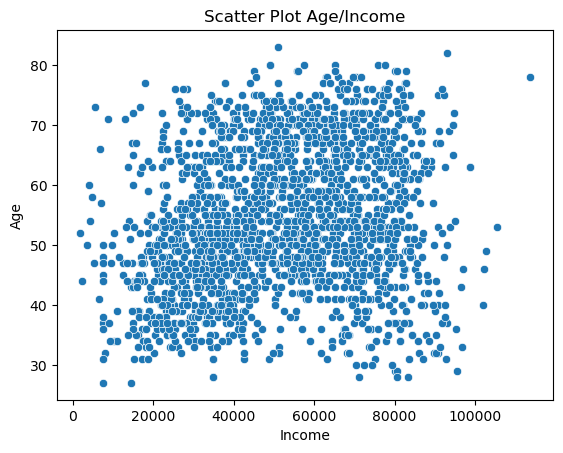

In [57]:
# Create a scatter plot of Age / Income

sns.scatterplot(x='Income', y='Age', data=df, palette='Set3')
plt.title('Scatter Plot Age/Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

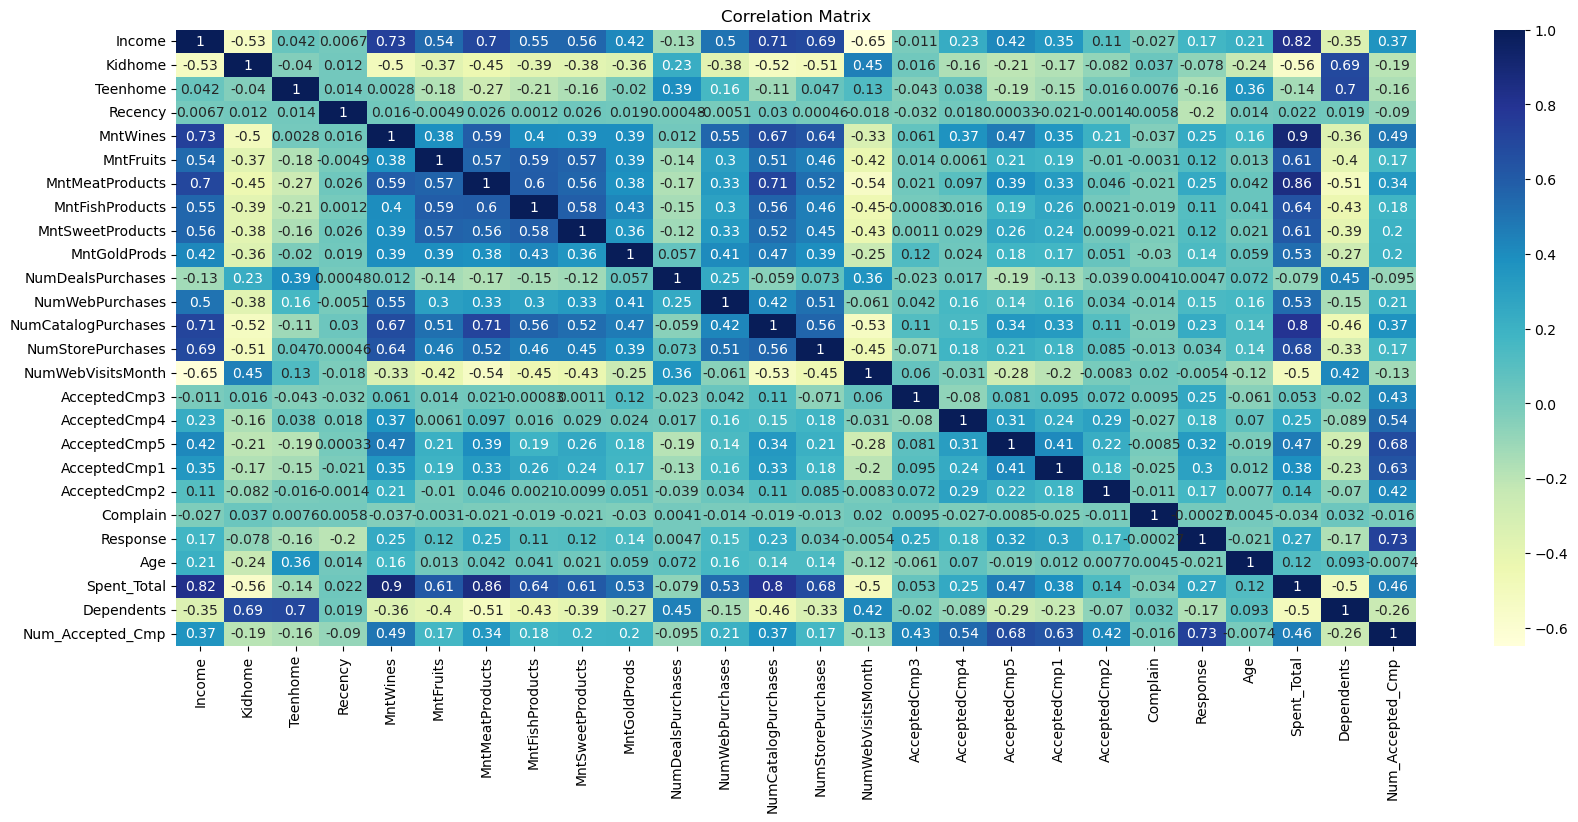

In [62]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).drop(columns=['ID', 'Year_Birth', 'Z_Revenue','Z_CostContact']).corr()

# plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


## Tables

In [58]:
pivot_table = pd.pivot_table(df, values='Income', index='Education', aggfunc=['mean', 'median'])
print(pivot_table)

#
pivot_table2 = pd.pivot_table(df, values='Income', index='marital_classification', aggfunc=['mean', 'median'])
print(pivot_table)

                    mean   median
                  Income   Income
Education                        
2n Cycle    47625.333333  46805.0
Basic       20306.259259  20744.0
Graduation  51984.008086  51948.0
Master      52629.579670  50920.5
PhD         55220.581933  55005.0
                    mean   median
                  Income   Income
Education                        
2n Cycle    47625.333333  46805.0
Basic       20306.259259  20744.0
Graduation  51984.008086  51948.0
Master      52629.579670  50920.5
PhD         55220.581933  55005.0


In [59]:
result_table1 = pd.concat([df['Education'].value_counts(), 
                          df['Education'].value_counts(normalize=True) * 100], 
                         axis=1, keys=['Count', 'Percentage']);print(result_table1)


result_table2 = pd.concat([df['Dependents'].value_counts(), 
                          df['Dependents'].value_counts(normalize=True) * 100], 
                         axis=1, keys=['Count', 'Percentage']);print(result_table2)



result_table3 = pd.concat([df['Marital_Status'].value_counts(), 
                          df['Marital_Status'].value_counts(normalize=True) * 100], 
                         axis=1, keys=['Count', 'Percentage']);print(result_table3)

            Count  Percentage
Graduation   1113   50.476190
PhD           476   21.587302
Master        364   16.507937
2n Cycle      198    8.979592
Basic          54    2.448980
   Count  Percentage
1   1112   50.430839
0    628   28.480726
2    415   18.820862
3     50    2.267574
          Count  Percentage
Married     854   38.730159
Together    568   25.759637
Single      470   21.315193
Divorced    230   10.430839
Widow        76    3.446712
Alone         3    0.136054
Absurd        2    0.090703
YOLO          2    0.090703
